In [8]:
import pandas as pd
from datetime import datetime

In [9]:
import os
print(os.listdir())


['Preprocess for Testing the Model.ipynb', '.DS_Store', 'VOX_Data_Fixed_With_Seg_Counts_New_For_Testing.csv', 'full df with wallet share by category.csv', 'Feel Good Rewards Segmentation-Copy2-jayan.ipynb', 'VOX_Data_Fixed_With_Seg_Counts.csv', 'Feel Good Rewards Segmentation.ipynb', 'Feel Good Rewards Segmentation-Copy1.ipynb', 'Final Dataset to Test using the Trained Model.csv', 'VOX_Data_PERCENTAGE_With_Seg_Counts.csv', 'RFM Values For Card_ID.csv', 'segmented Full dataset (1).csv', 'VOX_Data_Fixed_With_Seg_Counts Report.html']


In [10]:
df = pd.read_csv('./VOX_Data_PERCENTAGE_With_Seg_Counts.csv');


In [11]:
df.head()

,date,transaction_date,cardholder_id,card_id,card_segment,offer_segment,transaction_id,transaction_currency,transaction_currency_code,transaction_amount,...,redemption_limit,discount_type,percentage_value,minimum_spend,reward_every_transaction,reward_frequency,minimum_transactions,seg_total_transaction_count,seg_unique_user_count,casback_amount
0,2024-05-26 18:30:00,2024-05-23T23:48:18,a4810c27-3802-4377-9ef3-dd1c8ed80e84,dcb1cb81-3f02-ef11-a574-b8cef6052491,NEW,NaN,304144856984648,AUD,36,41.75,...,NaN,PERCENTAGE,2.0,NaN,YES,NaN,NaN,87,86,0.83
1,2024-05-26 18:00:00,2024-05-24T01:49:53,968b63c7-46e5-424d-9a8a-0dc75c6a635a,fd0a692d-2702-ef11-a574-b8cef6052491,NEW,NaN,304145065932986,AUD,36,62.96,...,NaN,PERCENTAGE,5.0,NaN,YES,NaN,NaN,100,96,3.14
2,2024-05-26 17:30:00,2024-05-23T00:21:43,393dfe13-b0fb-41e6-8258-58633c927fa0,3313065d-f301-ef11-a574-b8cef6052491,NEW,NaN,584144013033949,AUD,36,109.93,...,NaN,PERCENTAGE,15.0,100.0,YES,NaN,NaN,96,96,16.48
3,2024-05-26 17:30:00,2024-05-24T02:27:28,30547e90-76e8-4e8b-acc6-1b19e3617551,9029f311-0b02-ef11-a574-b8cef6052491,NEW,NaN,384145088486009,AUD,36,33.00,...,NaN,PERCENTAGE,5.0,NaN,YES,NaN,NaN,15,14,1.65
4,2024-05-26 17:15:00,2024-05-24T00:01:42,63f3dbc7-f53a-4620-848d-d3a049b2f3c1,dad2e071-ff01-ef11-a574-b8cef6052491,NEW,NaN,584145001025281,AUD,36,48.00,...,NaN,PERCENTAGE,5.0,NaN,YES,NaN,NaN,36,35,2.40


In [50]:
df.columns

Index(['Recency', 'Frequency', 'Monetary', 'Cluster',
       'wallet_share_by_category', 'transaction_amount', 'minimum_spend',
       'seg_unique_user_count', 'casback_amount', 'category_key_Beauty',
       'category_key_Entertainment', 'category_key_Fashion & Retail',
       'category_key_Health and Wellness', 'category_key_Retailers',
       'category_key_Travel'],
      dtype='object')

In [51]:
df["Recency"].describe()

count    839.000000
mean      28.330155
std        7.303312
min       17.000000
25%       23.000000
50%       27.000000
75%       34.000000
max       55.000000
Name: Recency, dtype: float64

In [12]:
df['casback_amount'].shape

(839,)

In [13]:
df['casback_amount'].describe()

count    839.000000
mean       9.470358
std        8.399667
min        0.030000
25%        3.490000
50%        5.950000
75%       15.690000
max       54.600000
Name: casback_amount, dtype: float64

In [14]:
df['casback_amount'].value_counts()

casback_amount
3.74     30
3.49     12
16.48    10
2.99     10
4.95      8
         ..
8.11      1
15.80     1
6.80      1
1.81      1
4.12      1
Name: count, Length: 499, dtype: int64

In [15]:
df.shape

(839, 29)

In [16]:
# df = df[['cardholder_id','card_id','transaction_id','transaction_date','transaction_amount','merchant_name',
#          'merchant_id','offer_id','casback_amount','category_key']]

In [17]:
# df.head()

In [18]:
# df['cardholder_id'].value_counts().max

In [19]:
import pandas as pd
from datetime import datetime

# Assuming the dataframe `df` is already loaded

# Extract only the date part from 'transaction_date'
df['transaction_date'] = df['transaction_date'].str.split('T').str[0]
    
# Convert the 'transaction_date' to datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%Y-%m-%d', errors='coerce')

# Print the dates again to check for any 'NaT' values
print(df['transaction_date'].head(10))

# # Assuming today's date is 2024-03-14
# current_date = datetime.now()

# # Calculate the most recent purchase date for each user
# df['Recency'] = df.groupby('cardholder_id')['transaction_date'].transform(max)

# # Calculate the recency as the difference in days from the current date
# df['Recency'] = (current_date - df['Recency']).dt.days

# # Display the dataframe to check results
# print(df[['cardholder_id', 'transaction_date', 'Recency']])


0   2024-05-23
1   2024-05-24
2   2024-05-23
3   2024-05-24
4   2024-05-24
5   2024-05-23
6   2024-05-24
7   2024-05-24
8   2024-05-23
9   2024-05-24
Name: transaction_date, dtype: datetime64[ns]


In [20]:
df.head()

,date,transaction_date,cardholder_id,card_id,card_segment,offer_segment,transaction_id,transaction_currency,transaction_currency_code,transaction_amount,...,redemption_limit,discount_type,percentage_value,minimum_spend,reward_every_transaction,reward_frequency,minimum_transactions,seg_total_transaction_count,seg_unique_user_count,casback_amount
0,2024-05-26 18:30:00,2024-05-23,a4810c27-3802-4377-9ef3-dd1c8ed80e84,dcb1cb81-3f02-ef11-a574-b8cef6052491,NEW,NaN,304144856984648,AUD,36,41.75,...,NaN,PERCENTAGE,2.0,NaN,YES,NaN,NaN,87,86,0.83
1,2024-05-26 18:00:00,2024-05-24,968b63c7-46e5-424d-9a8a-0dc75c6a635a,fd0a692d-2702-ef11-a574-b8cef6052491,NEW,NaN,304145065932986,AUD,36,62.96,...,NaN,PERCENTAGE,5.0,NaN,YES,NaN,NaN,100,96,3.14
2,2024-05-26 17:30:00,2024-05-23,393dfe13-b0fb-41e6-8258-58633c927fa0,3313065d-f301-ef11-a574-b8cef6052491,NEW,NaN,584144013033949,AUD,36,109.93,...,NaN,PERCENTAGE,15.0,100.0,YES,NaN,NaN,96,96,16.48
3,2024-05-26 17:30:00,2024-05-24,30547e90-76e8-4e8b-acc6-1b19e3617551,9029f311-0b02-ef11-a574-b8cef6052491,NEW,NaN,384145088486009,AUD,36,33.00,...,NaN,PERCENTAGE,5.0,NaN,YES,NaN,NaN,15,14,1.65
4,2024-05-26 17:15:00,2024-05-24,63f3dbc7-f53a-4620-848d-d3a049b2f3c1,dad2e071-ff01-ef11-a574-b8cef6052491,NEW,NaN,584145001025281,AUD,36,48.00,...,NaN,PERCENTAGE,5.0,NaN,YES,NaN,NaN,36,35,2.40


In [21]:
df.shape

(839, 29)

In [22]:

current_date = datetime.now()

# Calculate the most recent transaction date for each cardholder
most_recent_transactions = df.groupby('card_id')['transaction_date'].max().reset_index()
most_recent_transactions = most_recent_transactions.rename(columns={'transaction_date': 'most_recent_date'})

# Calculate the frequency of each cardholder_id
frequency = df['card_id'].value_counts().reset_index()
frequency.columns = ['card_id', 'Frequency']

# Calculate the monetary value for each cardholder
monetary = df.groupby('card_id')['transaction_amount'].sum().reset_index()
monetary.columns = ['card_id', 'Monetary']

# Merge these aggregated features
rfm = most_recent_transactions.merge(frequency, on='card_id')
rfm = rfm.merge(monetary, on='card_id')

# Calculate recency
rfm['Recency'] = (current_date - rfm['most_recent_date']).dt.days

# Drop the 'most_recent_date' column
rfm = rfm.drop(columns=['most_recent_date'])

# Now we have the RFM dataframe ready for clustering
print(rfm)



                                  card_id  Frequency  Monetary  Recency
0    008583e5-0702-ef11-a574-b8cef6052491          1     24.99       34
1    00ac2cfe-1902-ef11-a574-b8cef6052491          1     44.34       18
2    018e995f-0b02-ef11-a574-b8cef6052491          1    121.99       23
3    021d9fef-0502-ef11-a574-b8cef6052491          1     87.97       25
4    023d1564-3702-ef11-a574-b8cef6052491          1    136.80       26
..                                    ...        ...       ...      ...
800  fee2e2d8-1e02-ef11-a574-b8cef6052491          1     99.95       18
801  ff4fcba2-3302-ef11-a574-b8cef6052491          1    131.00       22
802  ff786884-2b02-ef11-a574-b8cef6052491          1    144.54       33
803  ffb4736c-1d02-ef11-a574-b8cef6052491          1    151.91       34
804  fffb5a56-2602-ef11-a574-b8cef6052491          1    116.93       37

[805 rows x 4 columns]


In [23]:
rfm.shape

(805, 4)

In [24]:
rfm.head()

,card_id,Frequency,Monetary,Recency
0,008583e5-0702-ef11-a574-b8cef6052491,1,24.99,34
1,00ac2cfe-1902-ef11-a574-b8cef6052491,1,44.34,18
2,018e995f-0b02-ef11-a574-b8cef6052491,1,121.99,23
3,021d9fef-0502-ef11-a574-b8cef6052491,1,87.97,25
4,023d1564-3702-ef11-a574-b8cef6052491,1,136.80,26


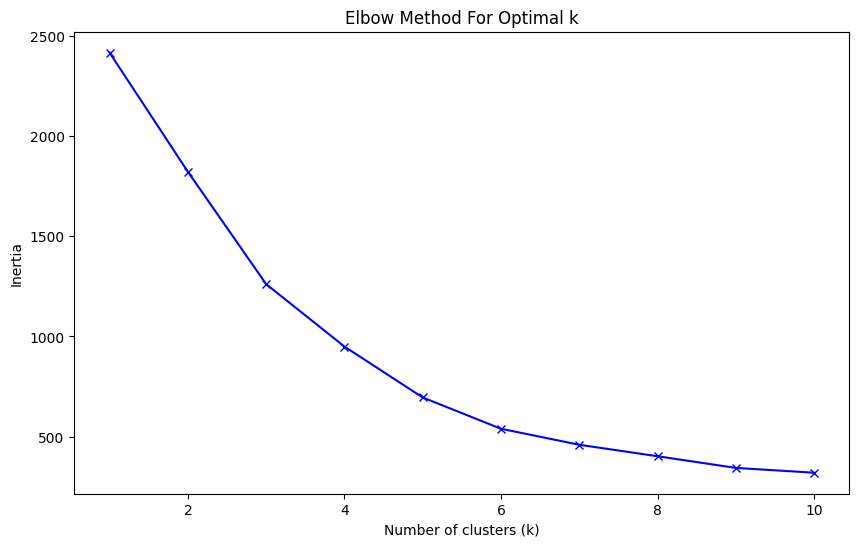

In [25]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [26]:
# Perform K-means clustering
from sklearn.cluster import KMeans

# Apply K-means
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Show the clustered data
rfm.head()


,card_id,Frequency,Monetary,Recency,Cluster
0,008583e5-0702-ef11-a574-b8cef6052491,1,24.99,34,1
1,00ac2cfe-1902-ef11-a574-b8cef6052491,1,44.34,18,0
2,018e995f-0b02-ef11-a574-b8cef6052491,1,121.99,23,0
3,021d9fef-0502-ef11-a574-b8cef6052491,1,87.97,25,0
4,023d1564-3702-ef11-a574-b8cef6052491,1,136.80,26,0


In [27]:
rfm['Cluster'].value_counts()

Cluster
0    476
1    322
2      7
Name: count, dtype: int64

Cluster 0 Insights:
Summary Statistics:
          Recency   Frequency     Monetary
count  476.000000  476.000000   476.000000
mean    23.321429    1.029412   122.394034
std      3.439652    0.169135   103.720759
min     17.000000    1.000000     3.940000
25%     20.000000    1.000000    59.967500
50%     23.000000    1.000000   101.955000
75%     26.000000    1.000000   150.102500
max     30.000000    2.000000  1015.450000


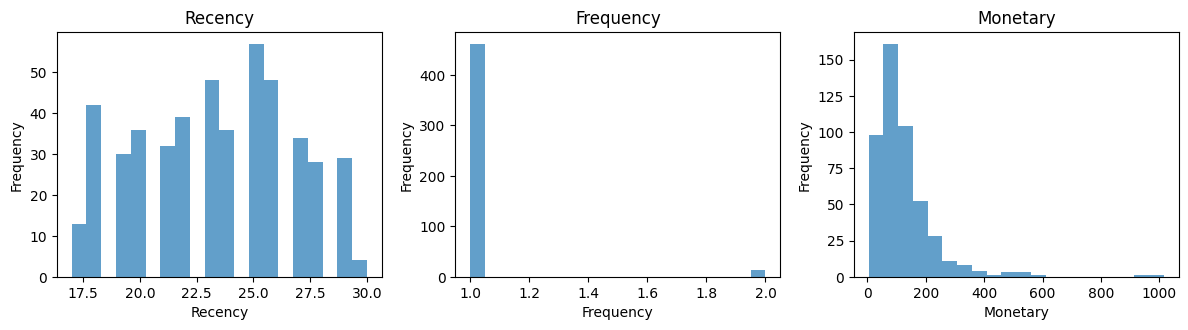

Cluster 1 Insights:
Summary Statistics:
          Recency   Frequency     Monetary
count  322.000000  322.000000   322.000000
mean    35.860248    1.012422   143.331739
std      4.071293    0.110934   147.274406
min     29.000000    1.000000     1.990000
25%     32.000000    1.000000    78.535000
50%     36.000000    1.000000   112.170000
75%     39.000000    1.000000   177.947500
max     55.000000    2.000000  1797.500000


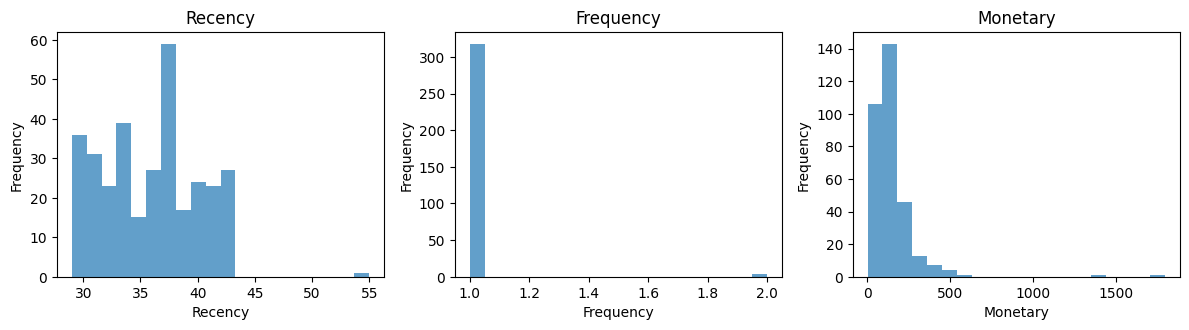

Cluster 2 Insights:
Summary Statistics:
         Recency  Frequency    Monetary
count   7.000000   7.000000    7.000000
mean   29.000000   3.285714  527.358571
std    12.124356   0.755929  254.416574
min    19.000000   2.000000  201.090000
25%    22.500000   3.000000  291.810000
50%    26.000000   3.000000  673.730000
75%    29.000000   4.000000  710.160000
max    55.000000   4.000000  812.750000


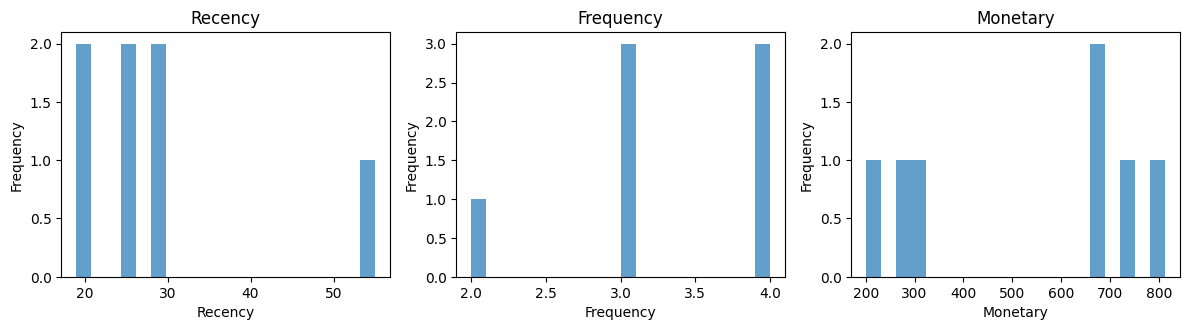

In [28]:
import matplotlib.pyplot as plt


features = ['Recency', 'Frequency', 'Monetary']

# Get the number of clusters
k = rfm['Cluster'].nunique()

# Iterate through each cluster
for cluster_id in range(k):
    # Filter the DataFrame to include only data points belonging to the current cluster
    cluster_data = rfm[rfm['Cluster'] == cluster_id]
    
    print(f"Cluster {cluster_id} Insights:")
    
    # Summary statistics
    print("Summary Statistics:")
    print(cluster_data[features].describe())
    
    # Visualization of features
    plt.figure(figsize=(12, 6))
    for i, feature in enumerate(features):
        plt.subplot(2, 3, i+1)
        plt.hist(cluster_data[feature], bins=20, alpha=0.7)
        plt.title(feature)
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


card_id 
Recency
Frequency
Monatary
offer category ex=beauty
wallet share by category -->  beauty
cluster number
offerid
Budget
min spend
default cashback
max cashback
number of users in the offer segment 
cashback amount    10 2 10    

In [29]:
# Assuming both 'df' and 'rfm' DataFrames are already loaded

# Perform the merge operation
merged_df = df.merge(rfm[['card_id','Recency', 'Frequency', 'Monetary','Cluster']], on='card_id', how='left')

# Display the first few rows of the merged DataFrame
merged_df.head()


,date,transaction_date,cardholder_id,card_id,card_segment,offer_segment,transaction_id,transaction_currency,transaction_currency_code,transaction_amount,...,reward_every_transaction,reward_frequency,minimum_transactions,seg_total_transaction_count,seg_unique_user_count,casback_amount,Recency,Frequency,Monetary,Cluster
0,2024-05-26 18:30:00,2024-05-23,a4810c27-3802-4377-9ef3-dd1c8ed80e84,dcb1cb81-3f02-ef11-a574-b8cef6052491,NEW,NaN,304144856984648,AUD,36,41.75,...,YES,NaN,NaN,87,86,0.83,18,1,41.75,0
1,2024-05-26 18:00:00,2024-05-24,968b63c7-46e5-424d-9a8a-0dc75c6a635a,fd0a692d-2702-ef11-a574-b8cef6052491,NEW,NaN,304145065932986,AUD,36,62.96,...,YES,NaN,NaN,100,96,3.14,17,1,62.96,0
2,2024-05-26 17:30:00,2024-05-23,393dfe13-b0fb-41e6-8258-58633c927fa0,3313065d-f301-ef11-a574-b8cef6052491,NEW,NaN,584144013033949,AUD,36,109.93,...,YES,NaN,NaN,96,96,16.48,18,1,109.93,0
3,2024-05-26 17:30:00,2024-05-24,30547e90-76e8-4e8b-acc6-1b19e3617551,9029f311-0b02-ef11-a574-b8cef6052491,NEW,NaN,384145088486009,AUD,36,33.00,...,YES,NaN,NaN,15,14,1.65,17,2,66.00,0
4,2024-05-26 17:15:00,2024-05-24,63f3dbc7-f53a-4620-848d-d3a049b2f3c1,dad2e071-ff01-ef11-a574-b8cef6052491,NEW,NaN,584145001025281,AUD,36,48.00,...,YES,NaN,NaN,36,35,2.40,17,1,48.00,0


In [30]:

df = merged_df

# Calculate total transaction amount for each card_id
total_transaction_amount_per_card = df.groupby('card_id')['transaction_amount'].sum().reset_index()
total_transaction_amount_per_card.rename(columns={'transaction_amount': 'total_amount_per_card'}, inplace=True)

# Calculate total transaction amount for each card_id and category_key
total_transaction_amount_per_card_category = df.groupby(['card_id', 'category_key'])['transaction_amount'].sum().reset_index()
total_transaction_amount_per_card_category.rename(columns={'transaction_amount': 'total_amount_per_card_category'}, inplace=True)

# Merge these totals back to the original DataFrame
df = df.merge(total_transaction_amount_per_card, on='card_id', how='left')
df = df.merge(total_transaction_amount_per_card_category, on=['card_id', 'category_key'], how='left')

# # Calculate the wallet share by category
# df['wallet_share_by_category'] = df['total_amount_per_card_category'] / df['total_amount_per_card']
# Calculate the wallet share by category
df['wallet_share_by_category'] = df['total_amount_per_card_category']

# Drop the intermediate columns if needed
df.drop(columns=['total_amount_per_card', 'total_amount_per_card_category'], inplace=True)




In [31]:
df.to_csv('full df with wallet share by category.csv')

In [32]:
merged_df.to_csv('segmented Full dataset.csv')

In [33]:
#df_for_model_train = merged_df[['card_id','Recency', 'Frequency', 'Monetary','Cluster','category_key','wallet_share_by_category','offer_id','Budget','minimum_spend','default_cashback','max_cashbak','number_of_users_in_selected_offer_segment','casback_amount']]

In [34]:
df_for_training_model = df[['card_id','Recency', 'Frequency', 'Monetary','Cluster','category_key','wallet_share_by_category','offer_id','transaction_amount','minimum_spend','seg_unique_user_count','casback_amount']]

In [35]:
df_for_training_model.head()

,card_id,Recency,Frequency,Monetary,Cluster,category_key,wallet_share_by_category,offer_id,transaction_amount,minimum_spend,seg_unique_user_count,casback_amount
0,dcb1cb81-3f02-ef11-a574-b8cef6052491,18,1,41.75,0,Retailers,41.75,312,41.75,NaN,86,0.83
1,fd0a692d-2702-ef11-a574-b8cef6052491,17,1,62.96,0,Fashion & Retail,62.96,325,62.96,NaN,96,3.14
2,3313065d-f301-ef11-a574-b8cef6052491,18,1,109.93,0,Fashion & Retail,109.93,284,109.93,100.0,96,16.48
3,9029f311-0b02-ef11-a574-b8cef6052491,17,2,66.00,0,Entertainment,66.00,286,33.00,NaN,14,1.65
4,dad2e071-ff01-ef11-a574-b8cef6052491,17,1,48.00,0,Entertainment,48.00,285,48.00,NaN,35,2.40


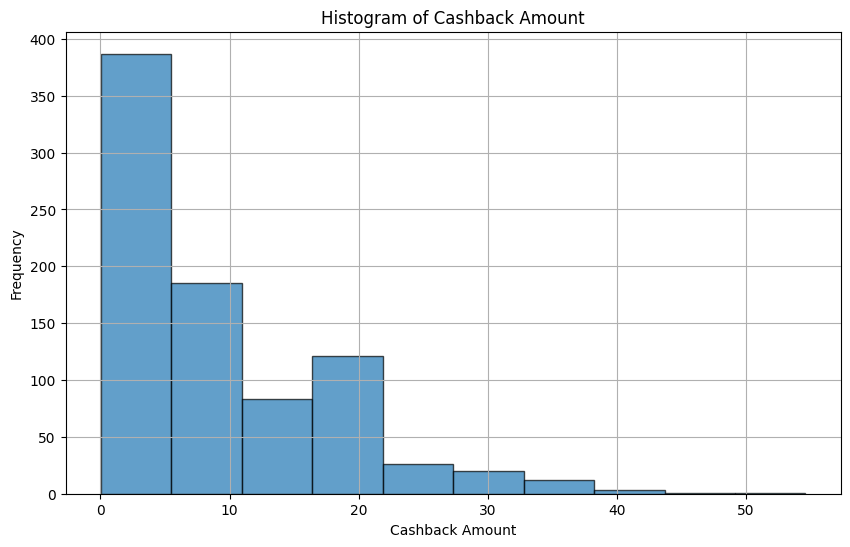

In [36]:
# Create DataFrame
df = df_for_training_model


# Plot Histogram using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['casback_amount'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Cashback Amount')
plt.xlabel('Cashback Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/var/folders/20/rv098dm17pn4rlbzdlsk2c240000gn/T/ipykernel_12235/1575813612.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['casback_amount'], shade=True)


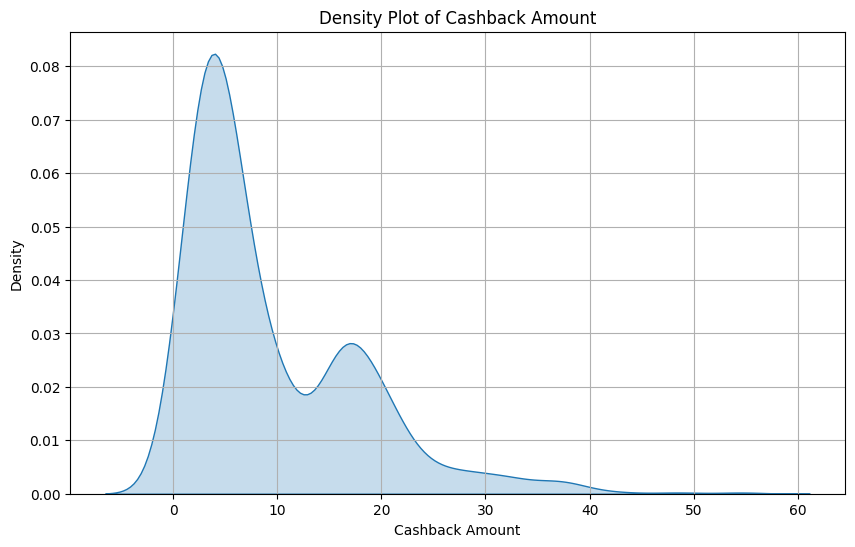

In [37]:
import seaborn as sns

# Plot Density Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(df['casback_amount'], shade=True)
plt.title('Density Plot of Cashback Amount')
plt.xlabel('Cashback Amount')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Create DataFrame
df = df_for_training_model

# Drop unnecessary columns
df = df.drop(columns=['card_id', 'offer_id'])

# One-hot encode the 'category_key' column
df = pd.get_dummies(df, columns=['category_key'])



In [39]:
df.head()


,Recency,Frequency,Monetary,Cluster,wallet_share_by_category,transaction_amount,minimum_spend,seg_unique_user_count,casback_amount,category_key_Beauty,category_key_Entertainment,category_key_Fashion & Retail,category_key_Health and Wellness,category_key_Retailers,category_key_Travel
0,18,1,41.75,0,41.75,41.75,NaN,86,0.83,False,False,False,False,True,False
1,17,1,62.96,0,62.96,62.96,NaN,96,3.14,False,False,True,False,False,False
2,18,1,109.93,0,109.93,109.93,100.0,96,16.48,False,False,True,False,False,False
3,17,2,66.00,0,66.00,33.00,NaN,14,1.65,False,True,False,False,False,False
4,17,1,48.00,0,48.00,48.00,NaN,35,2.40,False,True,False,False,False,False


In [40]:
# Define feature matrix X and target variable y
X = df.drop(columns=['casback_amount'])
#X = scaler.fit_transform(X)
y = df['casback_amount']


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [43]:
# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.9458711669642947
R-squared: 0.9663593208588618


In [45]:
# Function to preprocess a new record and predict cashback amount
def preprocess_and_predict(new_record, model, columns):
    # Create DataFrame for the new record
    new_df = pd.DataFrame([new_record])
    
    # Drop unnecessary columns
    new_df = new_df.drop(columns=['card_id', 'offer_id'])
    
    # One-hot encode the 'category_key' column
    new_df = pd.get_dummies(new_df, columns=['category_key'])
    
    # Reindex to ensure all columns are present, missing columns are filled with 0
    new_df = new_df.reindex(columns=columns, fill_value=0)
    
    # Predict using the trained model
    prediction = model.predict(new_df)
    return prediction[0]

In [46]:
# New record to predict
new_record = {
    'card_id': '12345',  # This will be dropped
    'Recency': 50,
    'Frequency': 20,
    'Monetary': 2000,
    'Cluster': 1,
    'category_key': 'Restaurants',
    'wallet_share_by_category': 9.0,
    'transaction_amount': 200,
    'offer_id': 999,  # This will be dropped
    'minimum_spend': 100,
    'seg_unique_user_count': 500
}

# List of columns in the training data after one-hot encoding
columns = list(X.columns)

# Predict cashback amount for the new record
predicted_cashback = preprocess_and_predict(new_record, rf, columns)
print(f'Predicted Cashback Amount: {predicted_cashback}')

Predicted Cashback Amount: 26.7478


In [47]:
# # Calculate the frequency of each cardholder_id
# frequency = df['cardholder_id'].value_counts()

# # Map the frequencies back to the original DataFrame
# df['frequency'] = df['cardholder_id'].map(frequency)




KeyError: 'cardholder_id'

In [ ]:
df.head(20)

In [ ]:
!pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)

Report VOX_Data_Fixed_With_Seg_Counts Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
